In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os,joblib 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LinearRegression,BayesianRidge,LassoCV,ElasticNetCV,LarsCV,LassoLarsCV,HuberRegressor,RidgeCV
from sklearn.ensemble import StackingRegressor,RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import (mean_absolute_error,mean_squared_error,mean_squared_log_error,
                             median_absolute_error,r2_score)

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 101
cv = KFold(n_splits=50,shuffle=True,random_state=RANDOM_SEED)


import collections
from mpl_toolkits import mplot3d

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape

(8523, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
for col in train.columns:
    print(col," : ")
    print(train[col].nunique())
    print(train[col].value_counts())
    print("\n")

Item_Identifier  : 
1559
FDW13    10
FDG33    10
FDU12     9
FDO19     9
FDV60     9
         ..
FDK57     1
FDQ60     1
FDO33     1
FDY43     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Weight  : 
415
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64


Item_Fat_Content  : 
5
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Visibility  : 
7880
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64


Item_Type  : 
16
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned             

## Benchmark

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
mrp=[]
sales=[]
for k,df in train.groupby(['Item_Type','Outlet_Type']):
    print("\n",k)
    print("Mean MRP: ",df['Item_MRP'].mean())
    mrp.append(df['Item_MRP'].mean())
    
    print("Mean Sales: ",df['Item_Outlet_Sales'].mean())
    sales.append(df['Item_Outlet_Sales'].mean())


 ('Baking Goods', 'Grocery Store')
Mean MRP:  126.43806823529414
Mean Sales:  292.08254352941174

 ('Baking Goods', 'Supermarket Type1')
Mean MRP:  125.97526150234755
Mean Sales:  2102.0212488262905

 ('Baking Goods', 'Supermarket Type2')
Mean MRP:  126.38531470588238
Mean Sales:  1780.3687823529408

 ('Baking Goods', 'Supermarket Type3')
Mean MRP:  128.80924347826087
Mean Sales:  3248.8724173913047

 ('Breads', 'Grocery Store')
Mean MRP:  146.4528727272727
Mean Sales:  381.96744242424234

 ('Breads', 'Supermarket Type1')
Mean MRP:  140.5675525
Mean Sales:  2346.928355

 ('Breads', 'Supermarket Type2')
Mean MRP:  131.08900740740742
Mean Sales:  2022.4044888888889

 ('Breads', 'Supermarket Type3')
Mean MRP:  145.67623870967745
Mean Sales:  3565.1227483870957

 ('Breakfast', 'Grocery Store')
Mean MRP:  147.0269894736842
Mean Sales:  412.8310421052632

 ('Breakfast', 'Supermarket Type1')
Mean MRP:  141.65657058823527
Mean Sales:  2228.334688235294

 ('Breakfast', 'Supermarket Type2')
Mea

Text(0.5, 1.0, ' Benchmark ')

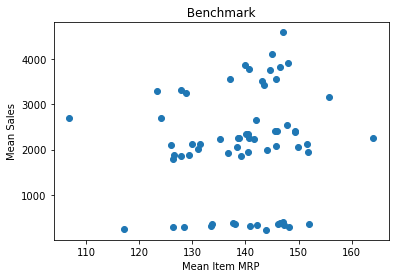

In [10]:
plt.scatter(np.array(mrp),np.array(sales))
plt.xlabel("Mean Item MRP")
plt.ylabel("Mean Sales")
plt.title(" Benchmark ")

### Steps for Data Preprocessing

- Data Cleansing --->> ( if there is cleaning reqd. )
- Missing values imputation --->> ( if there are missing values )
- Feature Engineering --->> ( if there are reqd. )
- Exploratory Data Analysis
- Outlier Handling  --->> (if there are outliers )
- Categorical Encoding --->> (if there are categorical vars)
- Data Splits
- Feature Scaling

#### Data Cleansing

In [11]:
item_fat_content_dict = {"low fat":"Low Fat",
                         "LF":"Low Fat",
                         "Low Fat":"Low Fat",
                         "Regular":"Regular",
                         "reg":"Regular"}

In [12]:
train["Item_Fat_Content"]

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [13]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].map(item_fat_content_dict)

### Missing Value Imputation

In [15]:
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

##### Mean Imputation

In [16]:
print("Mean: ",train['Item_Weight'].mean())

Mean:  12.857645184136183


In [17]:
train['Item_Weight_Mean'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

##### Median Imputation

In [18]:
print("Median: ",train['Item_Weight'].median())

Median:  12.6


In [19]:
train['Item_Weight_Median'] = train['Item_Weight'].fillna(train['Item_Weight'].median())

##### Custom Statistical Imputation

In [20]:
weight_dict = {}
for k, df in train.groupby(['Item_Type','Item_Fat_Content']):
    if df['Item_Weight'].isnull().sum() != 0:
        print(k," : ",df['Item_Weight'].isnull().sum(), " : ", df['Item_Weight'].shape[0])
        weight_dict[k] = df["Item_Weight"].mean()

('Baking Goods', 'Low Fat')  :  67  :  329
('Baking Goods', 'Regular')  :  45  :  319
('Breads', 'Low Fat')  :  27  :  140
('Breads', 'Regular')  :  20  :  111
('Breakfast', 'Low Fat')  :  7  :  41
('Breakfast', 'Regular')  :  14  :  69
('Canned', 'Low Fat')  :  55  :  341
('Canned', 'Regular')  :  55  :  308
('Dairy', 'Low Fat')  :  64  :  418
('Dairy', 'Regular')  :  52  :  264
('Frozen Foods', 'Low Fat')  :  75  :  450
('Frozen Foods', 'Regular')  :  63  :  406
('Fruits and Vegetables', 'Low Fat')  :  112  :  630
('Fruits and Vegetables', 'Regular')  :  101  :  602
('Hard Drinks', 'Low Fat')  :  31  :  214
('Health and Hygiene', 'Low Fat')  :  90  :  520
('Household', 'Low Fat')  :  151  :  910
('Meat', 'Low Fat')  :  38  :  170
('Meat', 'Regular')  :  50  :  255
('Others', 'Low Fat')  :  32  :  169
('Seafood', 'Low Fat')  :  8  :  37
('Seafood', 'Regular')  :  5  :  27
('Snack Foods', 'Low Fat')  :  127  :  692
('Snack Foods', 'Regular')  :  85  :  508
('Soft Drinks', 'Low Fat')  :

In [21]:
weight_dict

{('Baking Goods', 'Low Fat'): 12.552996183206107,
 ('Baking Goods', 'Regular'): 12.013302919708034,
 ('Breads', 'Low Fat'): 12.429911504424775,
 ('Breads', 'Regular'): 10.002142857142857,
 ('Breakfast', 'Low Fat'): 11.849411764705886,
 ('Breakfast', 'Regular'): 13.336181818181823,
 ('Canned', 'Low Fat'): 11.864650349650342,
 ('Canned', 'Regular'): 12.804288537549407,
 ('Dairy', 'Low Fat'): 13.391497175141243,
 ('Dairy', 'Regular'): 13.483797169811307,
 ('Frozen Foods', 'Low Fat'): 12.580333333333328,
 ('Frozen Foods', 'Regular'): 13.180539358600576,
 ('Fruits and Vegetables', 'Low Fat'): 12.757046332046352,
 ('Fruits and Vegetables', 'Regular'): 13.708363273453134,
 ('Hard Drinks', 'Low Fat'): 11.400327868852452,
 ('Health and Hygiene', 'Low Fat'): 13.142313953488392,
 ('Household', 'Low Fat'): 13.384736495388726,
 ('Meat', 'Low Fat'): 13.565643939393933,
 ('Meat', 'Regular'): 12.335512195121952,
 ('Others', 'Low Fat'): 13.853284671532842,
 ('Seafood', 'Low Fat'): 13.805344827586207,
 

In [22]:
train["Item_Weight_Grouped_Mean"] = train["Item_Weight"]
for k,v in weight_dict.items():
    train.loc[(train["Item_Type"] == k[0]) & (train["Item_Fat_Content"] == k[1]) & (train["Item_Weight"].isna()), "Item_Weight_Grouped_Mean"] = v

In [23]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
dtype: int64

##### Comparison of Imputation methods

In [24]:
var_original = train["Item_Weight"].var()
var_original

21.56168825983637

In [2]:
var_original = train["Item_Weight"].var()
var_mean = train["Item_Weight_Mean"].var()
var_median = train["Item_Weight_Median"].var()
var_gp_mean = train["Item_Weight_Grouped_Mean"].var()
    
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax = sns.kdeplot(train["Item_Weight"].dropna(), color="Red", shade = True, label="Original Variance : %.2f"%(var_original))
ax = sns.kdeplot(train["Item_Weight_Mean"], color="Blue", shade= True, label="Mean Variance : %.2f"%(var_mean))
ax = sns.kdeplot(train["Item_Weight_Median"], color="Green", shade = True, label="Median Variance : %.2f"%(var_median))
ax = sns.kdeplot(train["Item_Weight_Grouped_Mean"], color="Yellow", shade = True, label="Grouped Mean Variance : %.2f"%(var_gp_mean))
ax.set_xlabel("Item_Weight")
ax.set_ylabel("Frequency")
ax.legend(loc="best")
ax.set_title('Frequency Distribution of Item_Weight', fontsize = 15)

NameError: name 'train' is not defined

##### Mode Imputation

In [26]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [27]:
print("Mode: ",train['Outlet_Size'].mode().values[0])

Mode:  Medium


In [28]:
train['Outlet_Size_Mode'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode().values[0])

##### Custom Mode Imputation

In [29]:
train['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [30]:
size_dict = {}
for k, df in train.groupby(['Outlet_Type']):
    if df['Outlet_Size'].isnull().sum() != 0:
        print(k," : ",df['Outlet_Size'].isnull().sum(), " : ", df['Outlet_Size'].shape[0])
        size_dict[k] = df["Outlet_Size"].mode().values[0]

Grocery Store  :  555  :  1083
Supermarket Type1  :  1855  :  5577


In [31]:
train['Outlet_Size_Grouped_Mode'] = train['Outlet_Size']
for k,v in size_dict.items():
    train.loc[(train["Outlet_Type"] == k) & (train["Outlet_Size"].isna()), "Outlet_Size_Grouped_Mode"] = v

In [32]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
Outlet_Size_Mode                0
Outlet_Size_Grouped_Mode        0
dtype: int64

In [33]:
# Save Missing Data Imputation information
missing_dict = {"Item_Weight":weight_dict,
                "Outlet_Size":size_dict}

In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean,Outlet_Size_Mode,Outlet_Size_Grouped_Mode
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30,Medium,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92,Medium,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50,Medium,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20,Medium,Small
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93,High,High


### Exploratory Data Analysis

In [35]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_Mean',
       'Item_Weight_Median', 'Item_Weight_Grouped_Mean', 'Outlet_Size_Mode',
       'Outlet_Size_Grouped_Mode'],
      dtype='object')

In [36]:
num_cols = ['Item_Weight_Grouped_Mean','Item_Visibility','Item_MRP']
cat_cols = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size_Grouped_Mode','Outlet_Location_Type','Outlet_Type']
target = 'Item_Outlet_Sales'

In [37]:
# Save Training data information
info_dict = {"Random_seed" : RANDOM_SEED,
             "Numeric_columns" : num_cols,
             "Categorical_columns" : cat_cols,
             "Target_columns" : target}

#### Exploratory Analysis

#### Univariate Analysis

- Continuous data -->> num_cols -->> pd.describe() --->> distribution (distplot/kdeplot), skewness
- Categorical data --> cat_cols -->> value_counts() --->> distribution (countplot,boxplot), outliers

##### Continuous

In [38]:
train[num_cols].describe()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.860708,0.066132,140.992782
std,4.237815,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,9.310000,0.026989,93.826500
50%,12.800000,0.053931,143.012800
75%,16.000000,0.094585,185.643700
max,21.350000,0.328391,266.888400


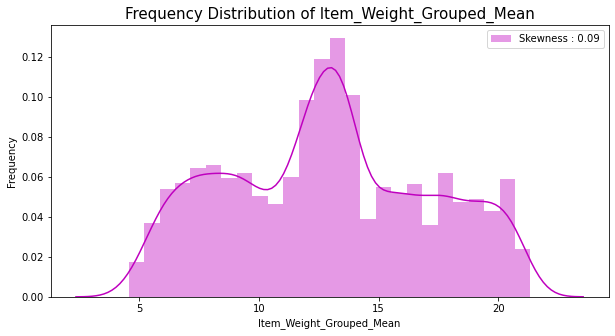

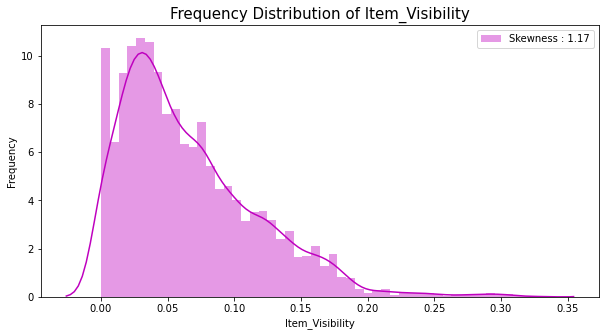

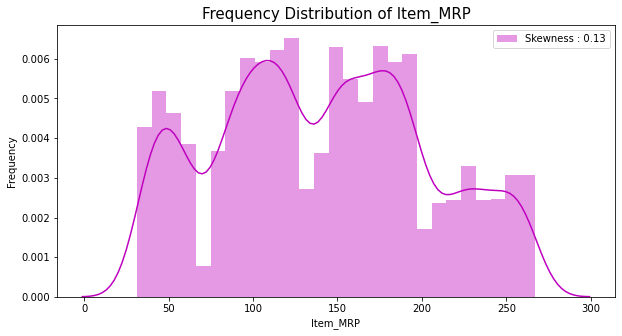

In [39]:
for col in num_cols:
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(train[col], color="m", label="Skewness : %.2f"%(train[col].skew()))
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend(loc='best')
    ax.set_title('Frequency Distribution of {}'.format(col), fontsize = 15)

##### Categorical

In [40]:
for col in cat_cols:
    print("\n",col," : ")
    print(train[col].value_counts())


 Item_Fat_Content  : 
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

 Item_Type  : 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

 Outlet_Establishment_Year  : 
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

 Outlet_Size_Grouped_Mode  : 
Small     4798
Medium    2793
High       932
Name: Outlet_Size_Grouped_Mode, dtype: int64

 Outlet_Location_Type  : 
Tier 3    3350
Tier 2    2785
Tier 1   

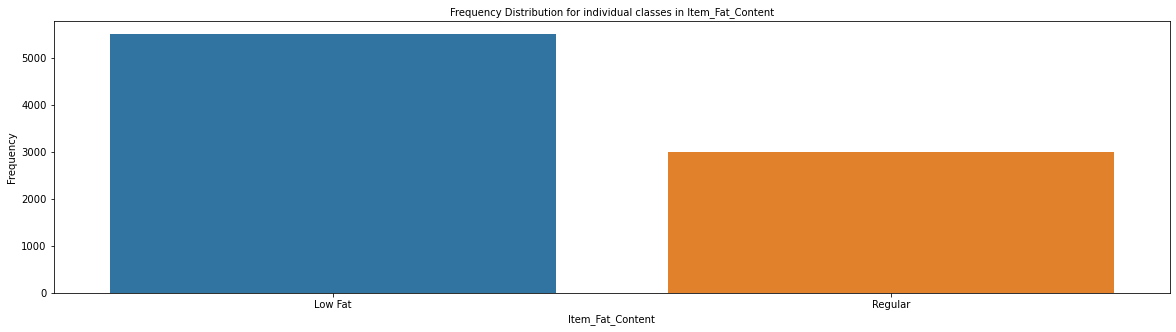

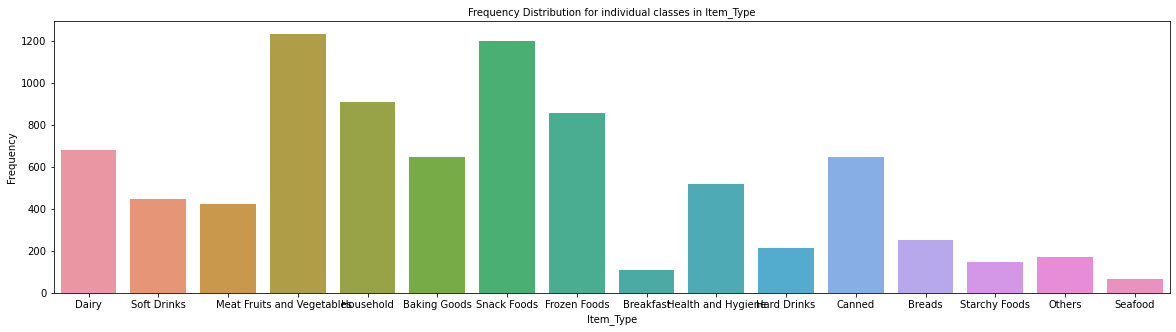

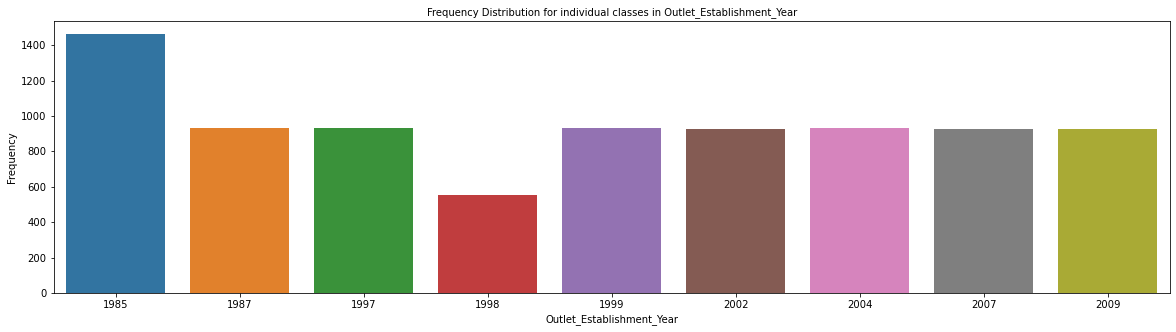

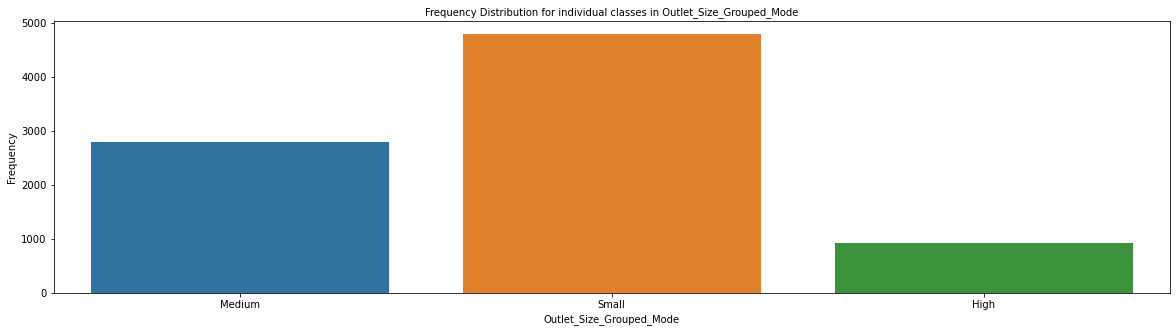

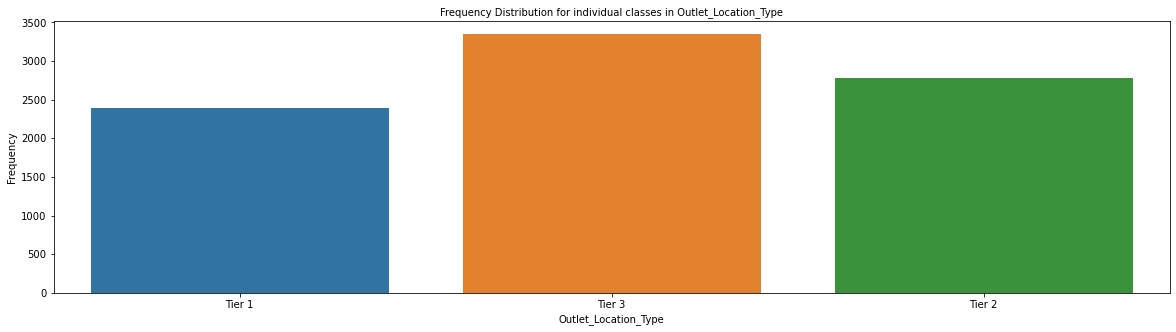

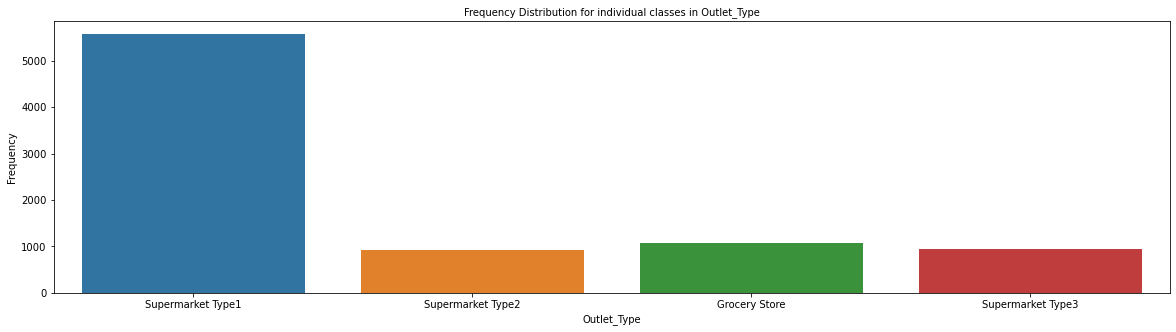

In [41]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (20,5))
    ax = fig.add_subplot(111)
    sns.countplot(x = cat_col,
                  data = train,
                  ax = ax)
    ax.set_xlabel(cat_col)
    ax.set_ylabel("Frequency")
    ax.set_title('Frequency Distribution for individual classes in {}'.format(cat_col), fontsize = 10)

#### Bivariate Analysis

- cont. vs cont. --->> pairplot
- cont. vs cat. --->> boxplot
- cat. vs cat. --->> heatmap

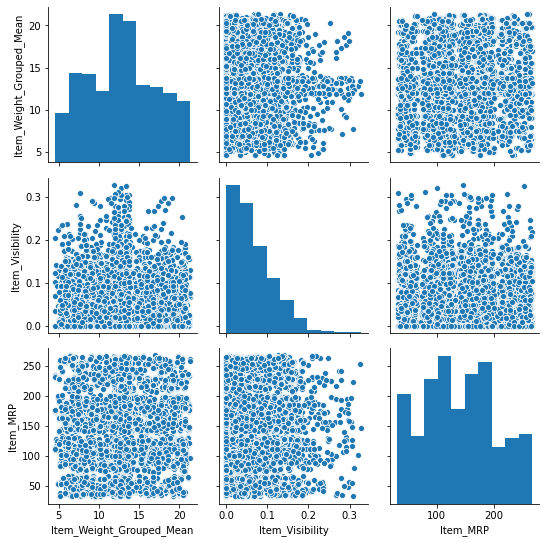

In [42]:
sns.pairplot(train[num_cols])

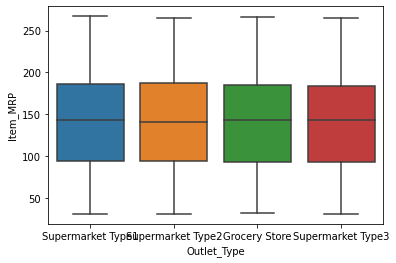

In [43]:
sns.boxplot(y = train['Item_MRP'], x = train['Outlet_Type'], data = train)

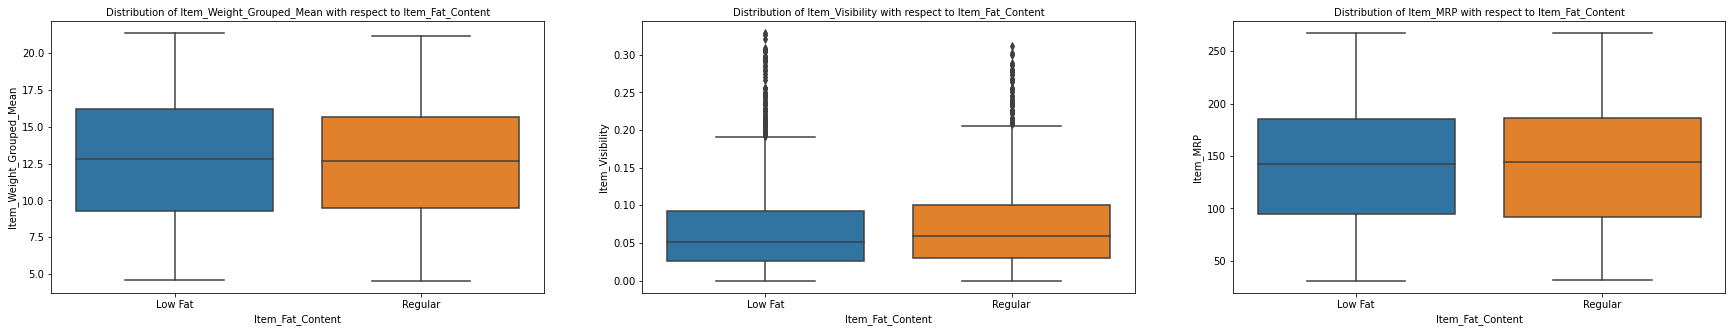

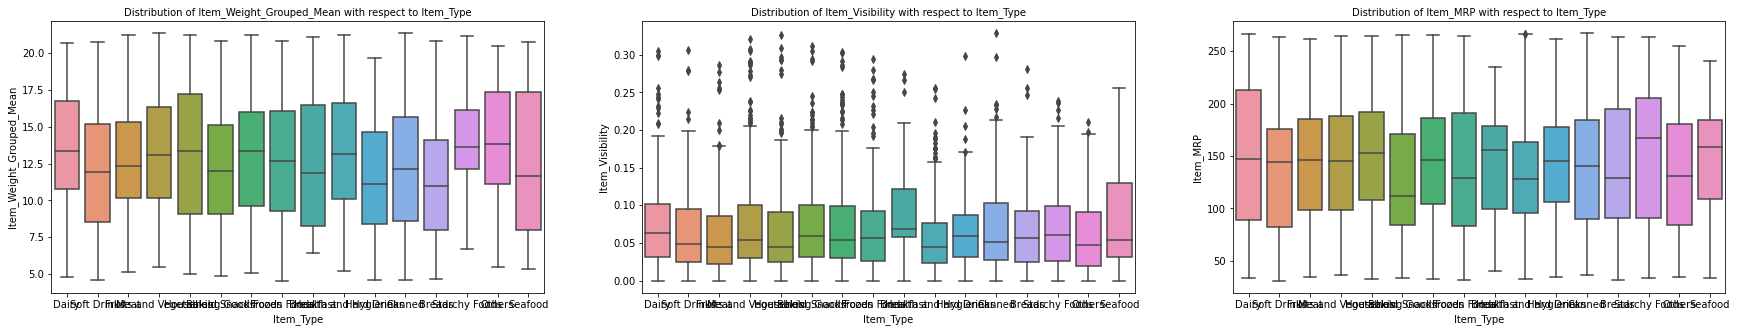

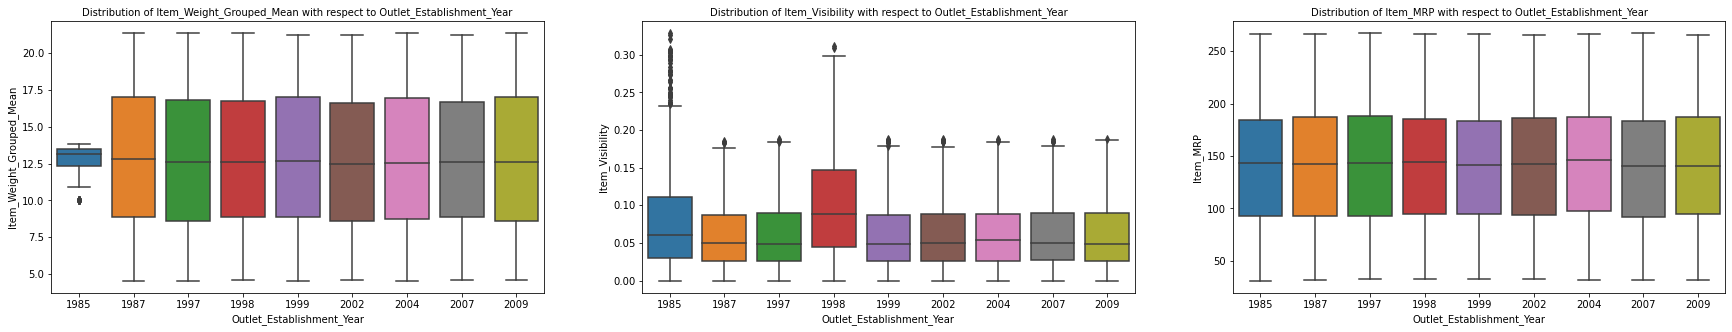

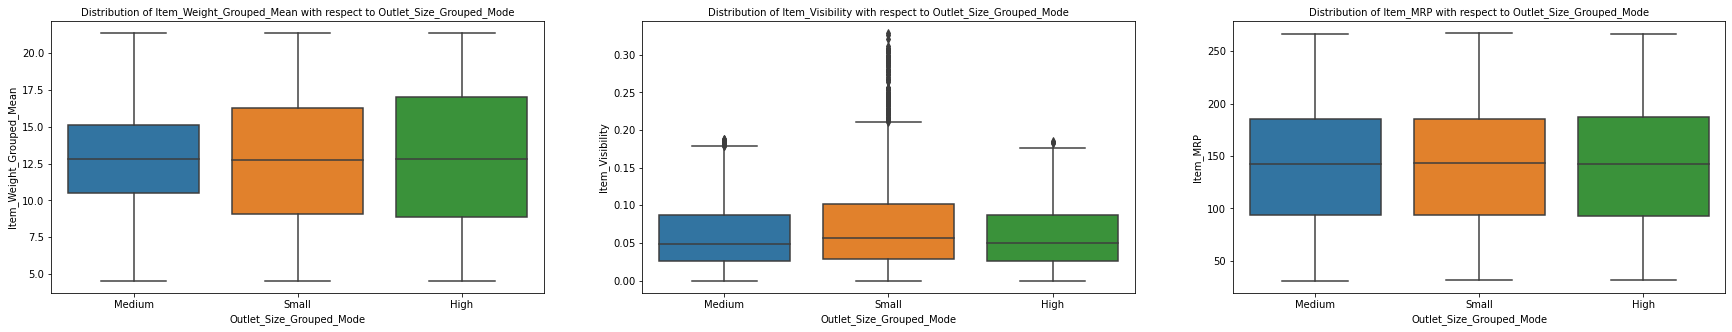

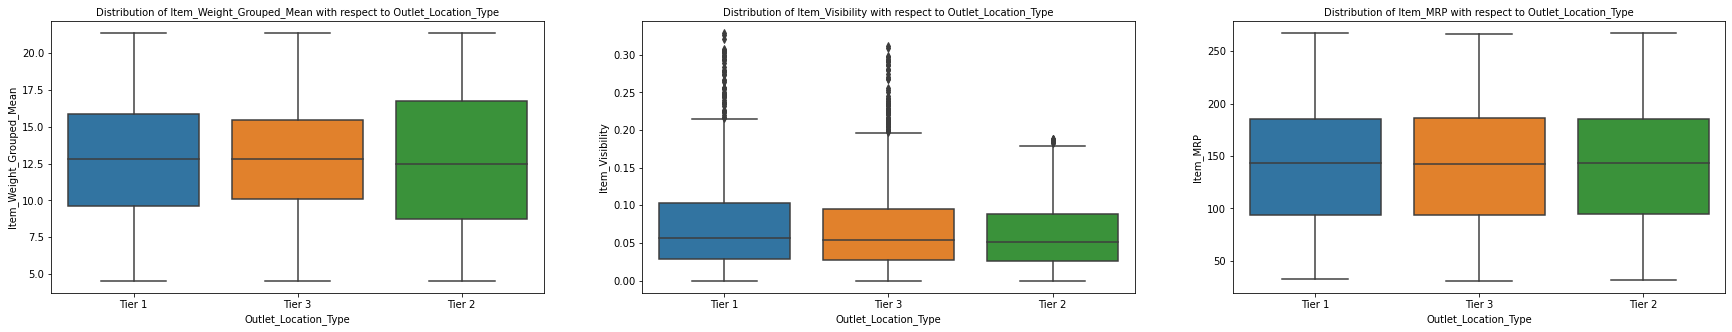

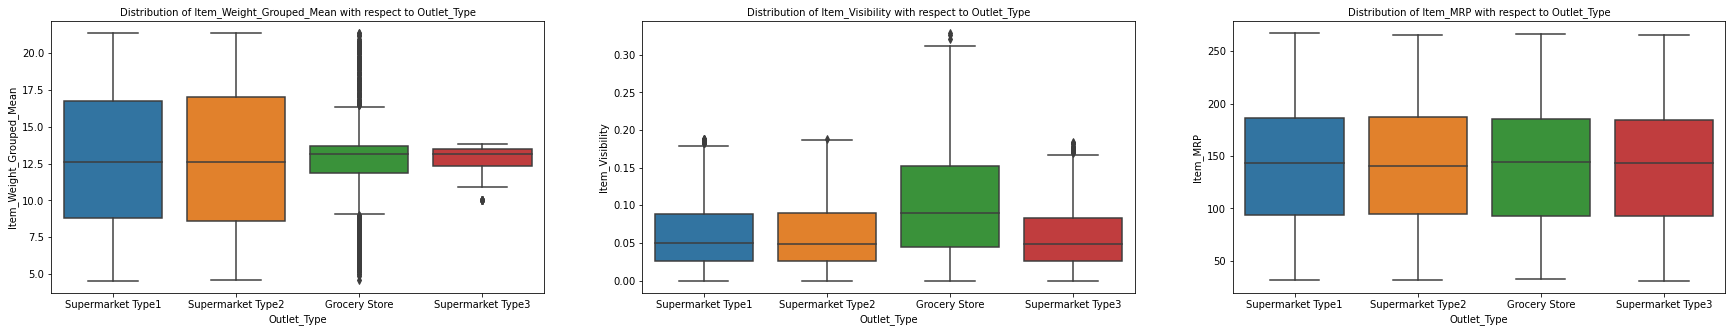

In [44]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (30,5))
    j = 1
    for num_col in num_cols:
        ax = fig.add_subplot(1,len(num_cols),j)
        sns.boxplot(y = num_col,
                    x = cat_col, 
                    data = train, 
                    ax = ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)
        ax.set_title('Distribution of {} with respect to {}'.format(num_col,cat_col), fontsize = 10)
        j = j + 1

In [45]:
train.shape

(8523, 17)

In [46]:
pivot = pd.pivot_table(train, columns = cat_cols, aggfunc='count')
pivot.shape

(3069,)

In [47]:
pivot

                  Item_Fat_Content  Item_Type      Outlet_Establishment_Year  Outlet_Size_Grouped_Mode  Outlet_Location_Type  Outlet_Type      
Item_Identifier   Low Fat           Baking Goods   1985                       Medium                    Tier 3                Supermarket Type3    39
                                                                              Small                     Tier 1                Grocery Store        28
                                                   1987                       High                      Tier 3                Supermarket Type1    35
                                                   1997                       Small                     Tier 1                Supermarket Type1    38
                                                   1998                       Small                     Tier 3                Grocery Store        20
                                                                                                          

#### Multi-variate analysis

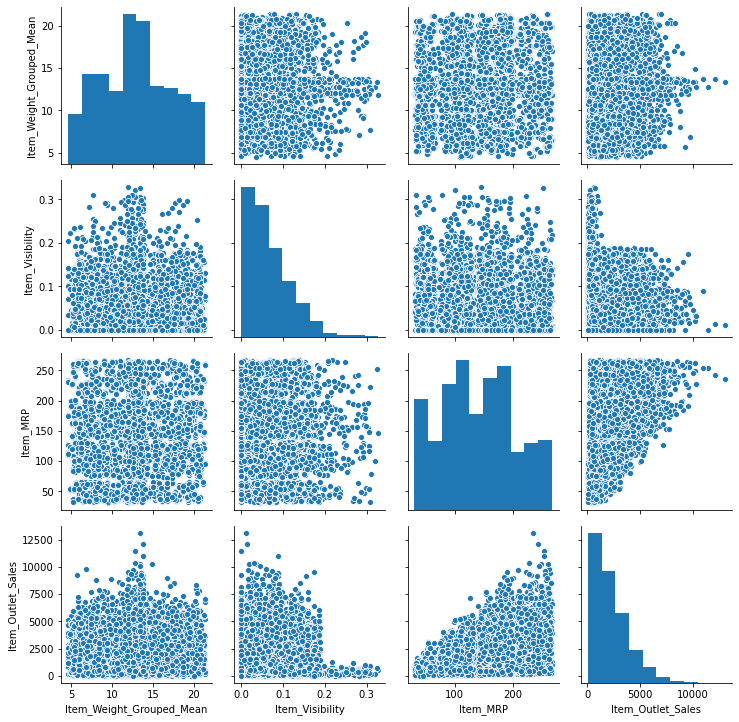

In [48]:
sns.pairplot(train[num_cols + [target]])

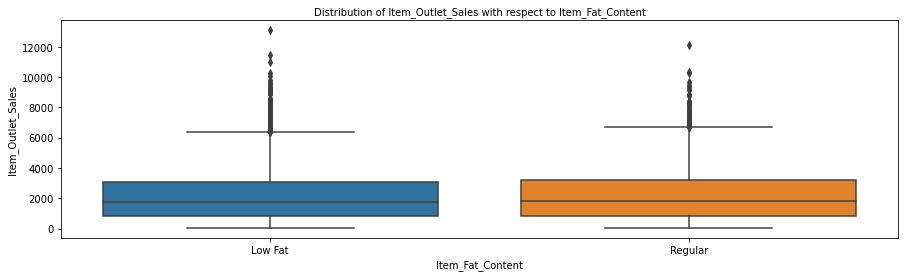

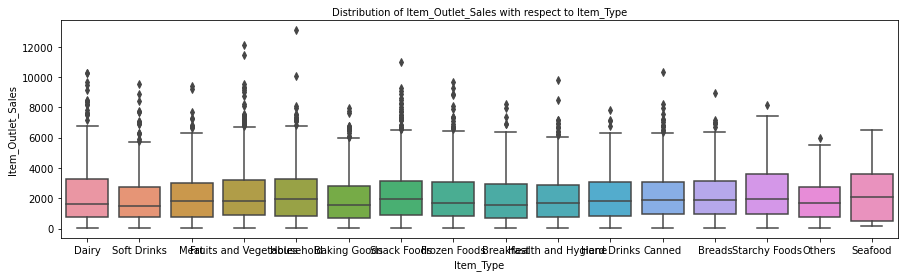

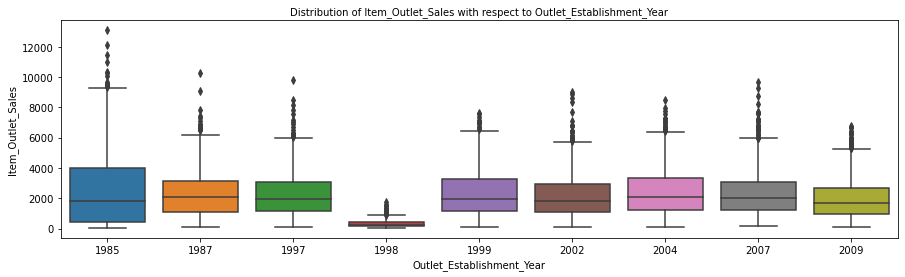

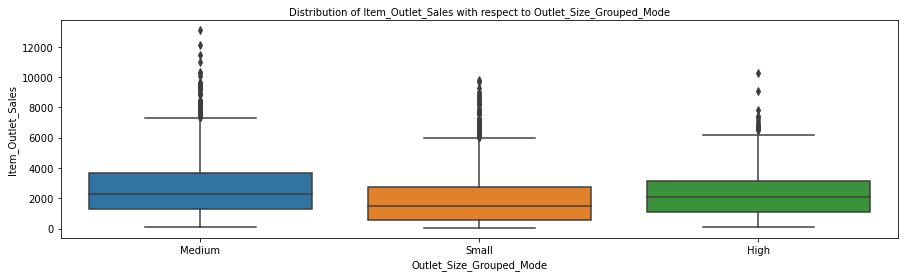

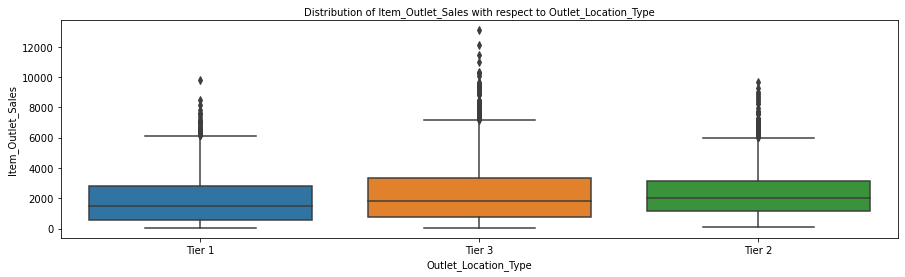

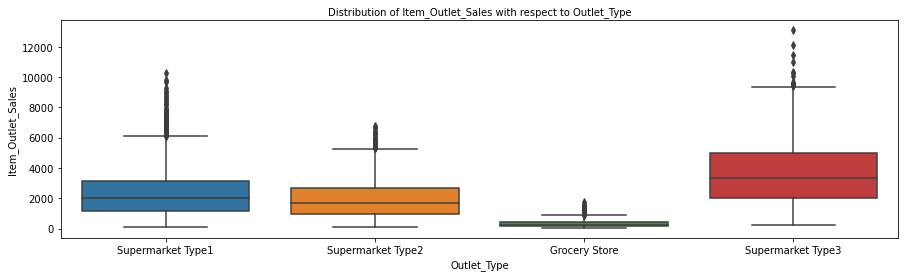

In [49]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (15,4))
    ax = fig.add_subplot(111)
    sns.boxplot(y = target,
                x = cat_col,
                data = train, 
                ax = ax)
    ax.set_xlabel(cat_col)
    ax.set_ylabel(target)
    ax.set_title('Distribution of {} with respect to {}'.format(target,cat_col), fontsize = 10)

### Outlier Handling

In [50]:
def handle_outliers(df,var,tol):
    var_data = df[var].values
    q25, q75 = np.percentile(var_data, 25), np.percentile(var_data, 75)
    
    print('Outliers handling for {}'.format(var))
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    
    iqr = q75 - q25
    print('IQR {}'.format(iqr))
    
    cut_off = iqr * tol
    lower, upper = q25 - cut_off, q75 + cut_off
    
    print('Cut Off: {}'.format(cut_off))
    print('{} Lower: {}'.format(var,lower))
    print('{} Upper: {}'.format(var,upper))
    
    outliers = [x for x in var_data if x < lower or x > upper]

    print('Number of Outliers in feature {}: {}'.format(var,len(outliers)))

    print('{} outliers:{}'.format(var,outliers))

    print('----' * 25)
    print('\n')
    print('\n')
        
    return list(df[(df[var] > upper) | (df[var] < lower)].index)

In [51]:
train_data = train.copy()

In [52]:
train.shape

(8523, 17)

In [53]:
outliers = []
for num_col in num_cols:
    outliers.extend(handle_outliers(train_data,num_col,1.5))
outliers = list(set(outliers))

train_data = train_data.drop(outliers)

Outliers handling for Item_Weight_Grouped_Mean
Quartile 25: 9.31 | Quartile 75: 16.0
IQR 6.6899999999999995
Cut Off: 10.035
Item_Weight_Grouped_Mean Lower: -0.7249999999999996
Item_Weight_Grouped_Mean Upper: 26.035
Number of Outliers in feature Item_Weight_Grouped_Mean: 0
Item_Weight_Grouped_Mean outliers:[]
----------------------------------------------------------------------------------------------------




Outliers handling for Item_Visibility
Quartile 25: 0.026989477499999998 | Quartile 75: 0.0945852925
IQR 0.067595815
Cut Off: 0.1013937225
Item_Visibility Lower: -0.07440424500000001
Item_Visibility Upper: 0.195979015
Number of Outliers in feature Item_Visibility: 144
Item_Visibility outliers:[0.25539489600000004, 0.293417759, 0.278974075, 0.291865402, 0.2047, 0.264124669, 0.228993134, 0.29788371199999997, 0.23303981699999998, 0.21037580600000003, 0.22022560800000002, 0.328390948, 0.20529482699999999, 0.247321039, 0.21413978600000003, 0.227189581, 0.223440258, 0.267352587, 0.2563

In [54]:
train_data.shape

(8379, 17)

In [55]:
8379 + 144

8523

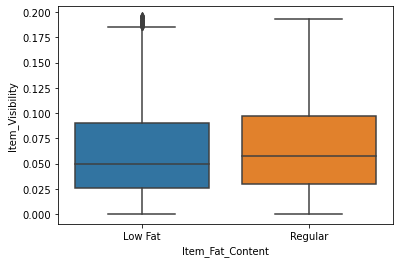

In [56]:
sns.boxplot(x="Item_Fat_Content",y="Item_Visibility",data=train_data)

### Categorical Encoding

In [57]:
train_data[num_cols + cat_cols].head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size_Grouped_Mode,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,Regular,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,Low Fat,Meat,1999,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,Regular,Fruits and Vegetables,1998,Small,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,Low Fat,Household,1987,High,Tier 3,Supermarket Type1


In [58]:
# One-Hot Encoding

train_data['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8379, dtype: object

In [59]:
pd.get_dummies(train_data[num_cols + cat_cols], columns=cat_cols, drop_first=True).shape

(8379, 34)

In [60]:
train_data_dum = pd.get_dummies(train_data[num_cols + cat_cols + [target]], columns=cat_cols, drop_first=True)

In [61]:
train_data_dum.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


### Data Splits

In [62]:
from sklearn.model_selection import train_test_split
train_data_trn, train_data_test = train_test_split(train_data_dum, test_size=0.2, random_state=102)

In [63]:
train_data_trn.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,11.800000,0.014116,178.5344,3390.2536,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
8356,13.707177,0.117531,222.7088,4026.7584,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7554,13.707177,0.079262,81.8250,83.2250,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2101,10.650000,0.048687,164.1526,1808.9786,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3550,11.400328,0.016745,180.7660,3056.0220,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [64]:
train_data_test.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7702,11.850000,0.055672,50.5666,922.7988,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2469,11.350000,0.000000,103.0016,2125.2336,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
804,16.100000,0.024928,95.1410,3089.3120,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
214,14.650000,0.000000,161.5552,324.9104,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2962,12.027116,0.117443,257.7304,774.9912,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [65]:
X_train = train_data_trn.drop(target,axis=1)
y_train = train_data_trn[target]

In [66]:
X_test = train_data_test.drop(target,axis=1)
y_test = train_data_test[target]

In [67]:
X_train.shape

(6703, 34)

In [68]:
y_train.shape

(6703,)

In [69]:
X_test.shape

(1676, 34)

In [70]:
y_test.shape

(1676,)

In [71]:
class Test:
    def __init__(self):
        self.var1=0;
        self.var2=0;
    
    def fit(self,x,y):
        self.var1 = x
        self.var2 = y
    
    def after_fit(self,):
        return self.var1 * self.var2

#### For any class in sklearn:

- Create an object of the class
- call "fit" method with the object
- call other methods after fit operation ( transform, predict )

In [75]:
obj = Test()

In [76]:
obj.fit(2,5)

In [77]:
obj.after_fit()

10

### Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()

In [80]:
sc.fit(X_train[num_cols])

StandardScaler()

In [81]:
X_train[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
2845,11.800000,0.014116,178.5344
8356,13.707177,0.117531,222.7088
7554,13.707177,0.079262,81.8250
2101,10.650000,0.048687,164.1526
3550,11.400328,0.016745,180.7660
...,...,...,...
982,7.680000,0.118673,192.2162
4140,19.350000,0.082251,48.7034
2929,15.100000,0.052329,243.1512
2327,12.804289,0.021002,185.1924


In [82]:
sc.mean_

array([1.28459782e+01, 6.34450837e-02, 1.41578760e+02])

In [80]:
sc.var_**0.5

array([4.26473373e+00, 4.62418207e-02, 6.24600140e+01])

In [89]:
X_train[num_cols] = sc.transform(X_train[num_cols])

In [90]:
X_train[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
2845,-0.245262,-1.066772,0.591669
8356,0.201935,1.169629,1.298912
7554,0.201935,0.342042,-0.956672
2101,-0.514916,-0.319157,0.361413
3550,-0.338978,-1.009904,0.627397
...,...,...,...
982,-1.211325,1.194318,0.810718
4140,1.525071,0.406683,-1.486957
2929,0.528526,-0.240387,1.626199
2327,-0.009775,-0.917847,0.698265


In [91]:
X_test[num_cols] = sc.transform(X_test[num_cols])

In [92]:
X_test[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
7702,-3.066901,-5.007173,-2.290039
2469,-3.094392,-31.042751,-2.276599
804,-2.833230,-19.384760,-2.278614
214,-2.912953,-31.042751,-2.261590
2962,-3.057163,23.880557,-2.236937
...,...,...,...
4305,-3.400638,3.604942,-2.235085
5182,-2.772750,-19.206683,-2.265310
2109,-3.017030,-14.329814,-2.236195
2973,-3.261260,-14.381202,-2.265412


In [93]:
X_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,-0.245262,-1.066772,0.591669,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
8356,0.201935,1.169629,1.298912,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7554,0.201935,0.342042,-0.956672,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2101,-0.514916,-0.319157,0.361413,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3550,-0.338978,-1.009904,0.627397,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [95]:
X_train.shape

(6703, 34)

In [94]:
X_test.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7702,-3.066901,-5.007173,-2.290039,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2469,-3.094392,-31.042751,-2.276599,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
804,-2.833230,-19.384760,-2.278614,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
214,-2.912953,-31.042751,-2.261590,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2962,-3.057163,23.880557,-2.236937,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [96]:
X_test.shape

(1676, 34)

## End of Data Processing!!!!

## Modelling

### Benchmark ==>> Simple Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lin_reg_bm = LinearRegression()

#### sklearn expectations:
- X ===>> 2D array (matrix)
- y ===>> 1D array (vector)

In [101]:
X_train['Item_MRP'].values.reshape(-1,1).shape

(6703, 1)

In [102]:
lin_reg_bm.fit(X_train['Item_MRP'].values.reshape(-1,1),y_train.values)

LinearRegression()

In [103]:
b0 = lin_reg_bm.intercept_
b0

2218.945521139788

In [104]:
b1 = lin_reg_bm.coef_
b1

array([980.17492725])

##### Simple Linear Regression 
- y_train (Item_Outlet_Sales) = b0 + b1 * X_train (Item_MRP)

Text(0.5, 1.0, ' Benchmark ')

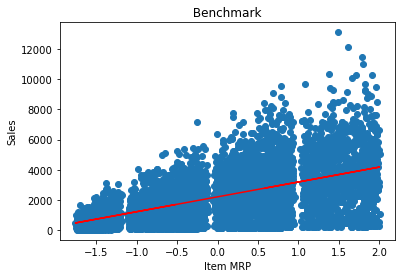

In [105]:
plt.scatter(X_train['Item_MRP'],y_train)
plt.plot(X_train['Item_MRP'],lin_reg_bm.predict(X_train['Item_MRP'].values.reshape(-1,1)),'r')
plt.xlabel("Item MRP")
plt.ylabel("Sales")
plt.title(" Benchmark ")

In [106]:
y_pred = lin_reg_bm.predict(X_test['Item_MRP'].values.reshape(-1,1))
y_pred

array([-25.69358405, -12.51949161, -14.49443718, ...,  27.08348598,
        -1.55440566,  23.47870657])

- Actuals ==> y_test
- Predictions ==> y_pred

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
mse = mean_squared_error(y_test,y_pred)
mse

NameError: name 'mean_squared_error' is not defined

In [110]:
rmse = mse**0.5
rmse

2769.504418027523

In [111]:
mae = mean_absolute_error(y_test,y_pred)
mae

2192.273750501875

### Multiple Linear Regression ==>> Machine learning

In [112]:
lin_reg_mlr = LinearRegression()

In [113]:
# train

lin_reg_mlr.fit(X_train,y_train)

LinearRegression()

In [114]:
X_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,-0.245262,-1.066772,0.591669,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
8356,0.201935,1.169629,1.298912,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7554,0.201935,0.342042,-0.956672,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2101,-0.514916,-0.319157,0.361413,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3550,-0.338978,-1.009904,0.627397,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [115]:
# Shape of input data
X_train.shape

(6703, 34)

In [116]:
b0 = lin_reg_mlr.intercept_
b0

1000.3572597050475

In [117]:
coeffs = lin_reg_mlr.coef_
coeffs

array([   2.72852549,  -20.21264712,  982.63760928,   61.62557013,
        -29.07772726,   91.89472507,   53.43355451,  -57.94260944,
        -41.32856708,   26.77357401,   27.40897915,  -24.11363548,
        -38.57227253,   28.41480233,   42.67044229,  193.36308106,
        -17.94146803,   15.49043506,  -73.93500848, -200.32092736,
        895.06661283, -559.97373073, -430.55350542,  114.1755791 ,
        319.76447622,  280.74162888, -155.66379329,  818.5931103 ,
       -618.27218295,  714.6816842 ,  488.85195764,  978.87386425,
       -155.66379329, 1404.81040901])

In [118]:
coeffs.shape

(34,)

##### Multiple Linear Regression ==>
- y_train = b0 + b1(coeffs[0]) * X_train['Item_Weight_Grouped_Mean'] + b2(coeffs[1]) * X_train['Item_Visibility'] .......

In [119]:
y_pred_mlr = lin_reg_mlr.predict(X_test)
y_pred_mlr

array([ 171.94908249,  821.03069408,  501.1966182 , ..., 1823.42866703,
        484.60111751, -194.52948671])

In [120]:
mse_mlr = mean_squared_error(y_test,y_pred_mlr)
mse_mlr

6922146.978935114

In [121]:
rmse_mlr = mse_mlr**0.5
rmse_mlr

2630.997335410113

In [122]:
mae_mlr = mean_absolute_error(y_test,y_pred_mlr)
mae_mlr

2162.029689452744

### Modelling at Scale ===>> Linear, Ridge, Lasso

In [110]:
from sklearn.linear_model import Ridge,Lasso

In [111]:
ridge = Ridge()
lasso = Lasso()

In [112]:
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
ridge.intercept_

1004.8025506392978

In [114]:
lasso.intercept_

627.5340608623912

In [115]:
ridge.coef_

array([   2.71329645,  -20.39381814,  982.50061998,   61.63250048,
        -29.29508067,   90.30564913,   53.08513825,  -58.18180403,
        -41.59966042,   26.45552476,   26.91066063,  -24.46797108,
        -38.88660232,   27.97349291,   41.71186051,  189.47334003,
        -18.23240458,   15.04726157,  -73.48678418, -199.24347289,
        892.02294346, -560.8353351 , -429.73623175,  113.81537907,
        319.11552752,  280.12807258, -155.74186644,  817.01464135,
       -617.77116845,  713.05897917,  486.6720651 ,  976.10221799,
       -155.74186644, 1402.49273954])

In [116]:
lasso.coef_

array([ 1.00645167e+00, -2.02258405e+01,  9.81263010e+02,  5.96185876e+01,
       -0.00000000e+00,  1.00186709e+01,  3.99945069e+01, -4.68904717e+01,
       -3.22142746e+01,  1.92025050e+01,  0.00000000e+00, -9.75778477e+00,
       -3.11961740e+01,  6.31280715e+00,  0.00000000e+00,  6.53715378e+01,
       -1.17030823e+01,  0.00000000e+00, -1.34546965e+01,  0.00000000e+00,
        8.12742287e+02, -7.15998410e+02, -0.00000000e+00, -7.24640297e+00,
        1.79329901e+02,  1.39598122e+02,  0.00000000e+00,  7.36010187e+02,
       -2.06459636e+02,  7.72424795e+02,  6.26300516e+02,  1.01521935e+03,
        0.00000000e+00,  1.71534740e+03])

In [117]:
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [118]:
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)

In [119]:
rmse_ridge = mse_ridge**0.5
rmse_lasso = mse_lasso**0.5

In [120]:
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)

In [121]:
print("Ridge: \n",mse_ridge," : ",rmse_ridge," : ",mae_ridge)

Ridge: 
 1248032.3394817314  :  1117.1536776476778  :  826.9520353670933


In [122]:
print("Lasso: \n",mse_lasso," : ",rmse_lasso," : ",mae_lasso)

Lasso: 
 1244012.8730839551  :  1115.3532503579102  :  824.977216263618


### Modelling at Scale ==>> Multiple (OOPs)

In [130]:
regressors = ['LinearRegression','Ridge','Lasso','BayesianRidge','HuberRegressor']

In [137]:
models = []

mae = []
mse = []
mdae = []
rs = []

In [138]:
for regressor in regressors:
    model = eval(regressor)()
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    models.append(type(model).__name__)
    
    mae.append(mean_absolute_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    mdae.append(median_absolute_error(y_test,y_pred))
    rs.append(r2_score(y_test,y_pred))

In [139]:
model_dict = {"Models":models,
              "Mean_Squared_Error":mse,
              "Mean_Absolute_Error":mae,
              "Median_Absolute_Error":mdae,
              "R^2_score":rs}

In [140]:
model_dict

{'Models': ['LinearRegression',
  'Ridge',
  'Lasso',
  'BayesianRidge',
  'HuberRegressor'],
 'Mean_Squared_Error': [1248087.2842267158,
  1248032.3394817314,
  1244012.8730839551,
  1247858.6371513233,
  1265282.9771934645],
 'Mean_Absolute_Error': [827.0048347133468,
  826.9520353670933,
  824.977216263618,
  826.7522061173579,
  823.1155299335782],
 'Median_Absolute_Error': [615.9806671615179,
  615.6709360308804,
  620.270028951086,
  616.6622161921016,
  603.0511441281711],
 'R^2_score': [0.5688267390346493,
  0.568845720643682,
  0.5702343145793567,
  0.5689057291071813,
  0.56288619056121]}

In [144]:
model_df = pd.DataFrame(model_dict)
model_df["Root_Mean_Squared_Error"] = model_df["Mean_Squared_Error"] ** 0.5
model_df.sort_values(by=['R^2_score',
                         'Median_Absolute_Error'],
                     ascending=[False,
                                True],
                     inplace=True)
model_df

,Models,Mean_Squared_Error,Mean_Absolute_Error,Median_Absolute_Error,R^2_score,Root_Mean_Squared_Error
2,Lasso,1.244013e+06,824.977216,620.270029,0.570234,1115.353250
3,BayesianRidge,1.247859e+06,826.752206,616.662216,0.568906,1117.075932
1,Ridge,1.248032e+06,826.952035,615.670936,0.568846,1117.153678
0,LinearRegression,1.248087e+06,827.004835,615.980667,0.568827,1117.178269
4,HuberRegressor,1.265283e+06,823.115530,603.051144,0.562886,1124.847980


## Cross-Validation

In [145]:
from sklearn.model_selection import KFold,cross_validate,cross_val_score

In [146]:
kf = KFold(n_splits=50)

In [150]:
cv_scores = cross_val_score(estimator=lasso,X=X_train,y=y_train,cv=kf,n_jobs=12,verbose=1)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.3s finished


In [151]:
cv_scores

array([0.54940341, 0.55561941, 0.53545301, 0.35476821, 0.48609497,
       0.60251997, 0.58974482, 0.56515333, 0.61687252, 0.58829524,
       0.45176543, 0.53018858, 0.57176909, 0.52744924, 0.56081889,
       0.5639146 , 0.531431  , 0.56598816, 0.51600593, 0.48809214,
       0.6203055 , 0.56815248, 0.53080834, 0.55516792, 0.59943104,
       0.54124405, 0.54106087, 0.59665613, 0.49709589, 0.63013767,
       0.47269869, 0.54911728, 0.47556981, 0.53687332, 0.43018786,
       0.45999966, 0.56380571, 0.56687742, 0.64587321, 0.58914952,
       0.60574752, 0.61115656, 0.51099422, 0.51861627, 0.55864382,
       0.54314429, 0.53775917, 0.51086461, 0.52337122, 0.60562884])

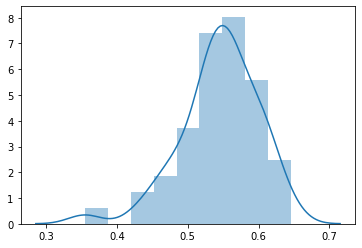

In [153]:
sns.distplot(cv_scores)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    2.0s finished


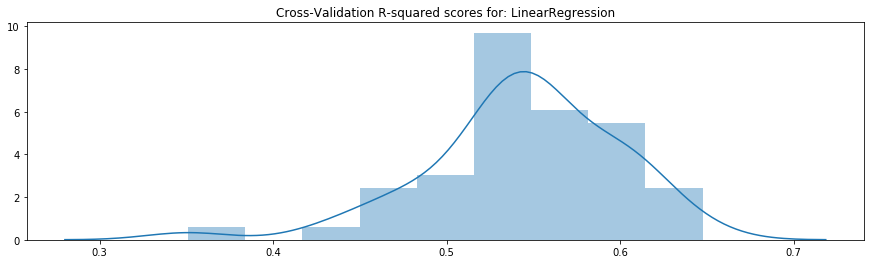

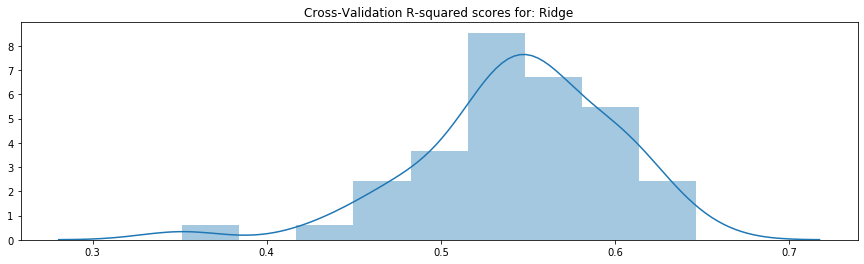

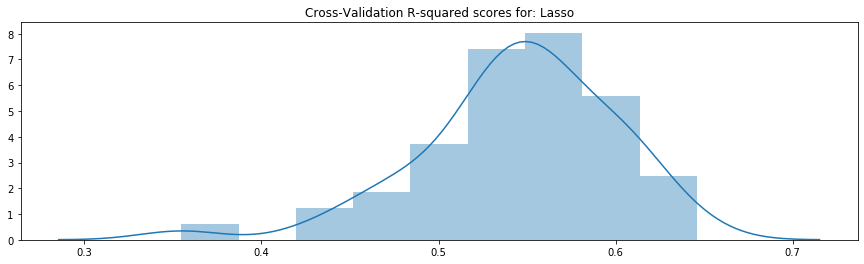

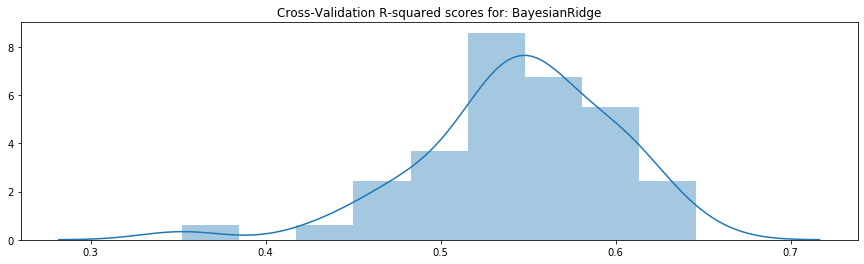

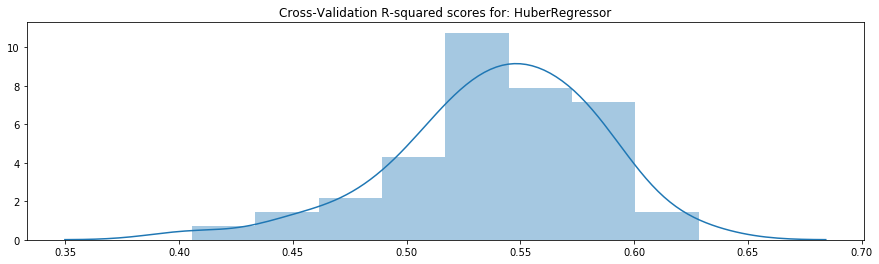

In [157]:
kf = KFold(n_splits=50)
for regressor in regressors:
    model = eval(regressor)()
    
    model.fit(X_train,y_train)
    cv_scores = cross_val_score(estimator=model,
                                X=X_train,
                                y=y_train,
                                cv=kf,
                                n_jobs=12,
                                verbose=1)
    fig = plt.figure(figsize = (15,4))
    ax = fig.add_subplot(111)
    ax = sns.distplot(cv_scores)
    ax.set_title("Cross-Validation R-squared scores for: {}".format(regressor))
    print("\n")